# Project Name - Online Retail Customer Segmentation

Project Type - Unsupervised ML

Contribution - Individual

Name - Vineeta Singh

Email Id - singhvineeta0118@gmail.com

# Project Summary-

We first started with knowing more about Problem statement and figuring out the best approach to solve it.

Customer segmentation is the process of dividing your customers into sub-groups based on shared features. Because you use on-site data to optimize advertising off-site, segmentation happens after the fact, unlike customization and targeting.

Because you need to build triggers so that your consumers see the advertisements when they arrive, you need to do your targeting and personalization before they arrive.

In the dataset, we don't have labels. So, the process lies in segmenting customers based on their behavior and then finding insights from that. For e-commerce, this type of information helps a lot in improving advertisements and marking ideas. With customer information and their purchasing behavior, we can cluster those customers in a bucket and then show customized advertisements and also review which platforms are giving us better results.

When a customer makes a purchase, there is some information that is now stored. Such information is given below:

InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country.

While importing Dataset and data inspection we got to know there are no major inconsistencies but we had to deal with missing and duplicate values. Whether to extract the InvoiceDate column at the start or to extract after some visualization was little challenging. So, we created 2 datasets considering both visualizations and at last chose the best path, which was to extract the Datetime feature after some major visualizations.

The sample size of this dataset is 541909. That means initially we had 541909 customer records. And we had 8 features and no label. So, we used all features and did some univariate and multivariate analysis which also included checking and changing the distribution of some variables.

One thing to notice is that we also had Datetime variable. Extracted it and we got many useful variables to form it.

This research work allows us to have an insight into the performance of various predictions and walk through the whole process of clustering.

We investigated the dataset, checked null values, duplicate values. Then getting Dataset ready for exploratory data analysis. Then we did some feature engineering, we extracted the Datetime column for getting some more useful columns. We also created the Total amount as a new variable. Thus, we prepared our data for models.

After that, we created an RFM model (Recency, Frequency, Monetary value). We did a log transformation of R, F, M for better results.

Now comes the model-building part, we used the K-Means clustering algorithm to find the optimal number of clusters that can separate customers based on their purchasing behavior. We then applied the K-Means algorithm with the Silhouette Score Method on RM, FM, RFM simultaneously. Where we got the optimal number of clusters = 2. We then visualized our results with scatterplots. Then moving forward, we applied K-Means with Elbow Method on RM, FM, RFM simultaneously.

Next, we applied DBSCAN on RM, FM, and RFM where we got the optimal number
of clusters as 2, 2, 3 simultaneously.

After that, we applied Dendrogram to find the optimal number of clusters and found that the optimal number of clusters is equal to 2.

By applying a different clustering algorithm to our dataset. we get the optimal number of clusters is equal to 2.

# GitHub Link-

https://github.com/vineeta0118/Online_Retail_Customer_Segmentation_ML

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Let's Begin !

# Importing Libraries

In [ ]:
# Importing common libraries
import numpy as np #for handling arrays
import pandas as pd #for data manipulation, read_excel
from numpy import math

%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns; sns.set()
import seaborn as sns #for better visualizations

from datetime import datetime
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
df=pd.read_excel('/content/drive/MyDrive/4_Unsupervised_Capstone/Online Retail.xlsx')

Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns

# Data Inspection

In [ ]:
# Checking the data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Checking for null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


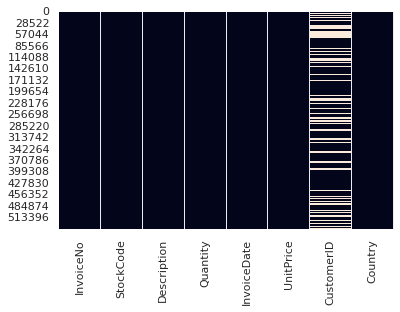

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Total null values of CustomerID
df['CustomerID'].isnull().sum()

135080

In [ ]:
# Total null values of Description column
df['Description'].isnull().sum()

1454

There is some null value present in our dataset like in CustomerID and Description

# dataset Information

In [ ]:
# df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
# df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
# df['InvoiceDate_day'] = df['InvoiceDate'].dt.day
# df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour
# df['InvoiceDate_minute'] = df['InvoiceDate'].dt.minute
# df['InvoiceDate_second'] = df['InvoiceDate'].dt.second

In [ ]:
# Columns and data types
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


We have 4 object type, 1 int, 2 float, 1 datetime feature.

In [ ]:
#column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#To check distribution describing dataset
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [ ]:
# figuring data types
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
# categorical columns
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [ ]:
# find unique values of categorical column
def unique_name_no(col):
  print(df[col].unique())
  print(df[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
[536365 536366 536367 ... 581585 581586 581587]
25900
STOCKCODE
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
4070
DESCRIPTION
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
4223
COUNTRY
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


In [ ]:
# duplicate
len(df[df.duplicated()])

5268

In [ ]:
#duplicate records
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
# Dropping Duplicate Rows
df=df.drop_duplicates()
len(df[df.duplicated()])

0

Dataset after removing duplicate values.

In [ ]:
#checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

There are 541909 rows and 8 columns in above dataset.

Above dataset has missing value on Description & CustomerID.

There are 5268 duplicate values.

# Missing Value Imputation

In [ ]:
#dropping missing values
df.dropna(inplace=True)

In [ ]:
#checking null values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now we cleaned null values.

In [ ]:
#records remaining after removing null values
df.shape

(401604, 8)

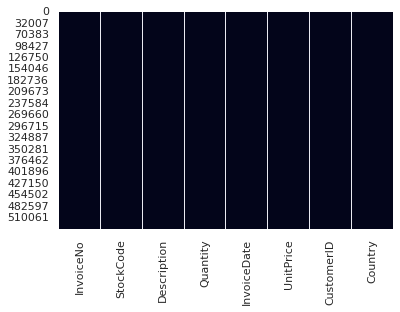

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


After removing null and duplicate values in our dataset. It reduces to (401604, 8)

In [ ]:
#treatment of InvoiceNo
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
# removing InvoiceNo which contains C
df=df[~df['InvoiceNo'].str.contains('C')]

## we have to drop some InvoiceNo which are starts with 'C' because 'C', it indicates a cancellation

In [ ]:
#rows and columns
df.shape

(392732, 8)

Now after treatment of Dataset, We have 392732 rows and 8 columns.

In [ ]:
#checking distribution
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


There can be outliers in Quantity

# Dataset is ready for EDA.`

# Exploratory data analysis

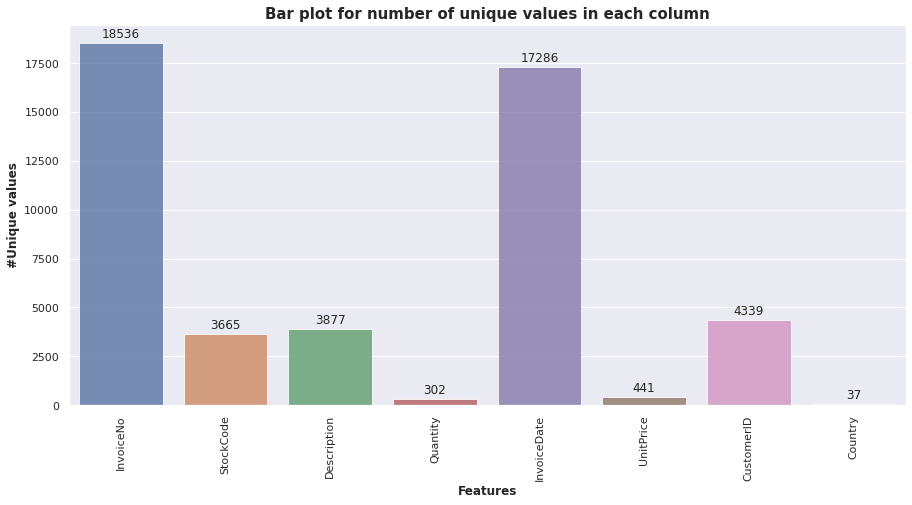

In [ ]:
#Counting unique value of features
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

Higher no. of Invoice No is justificable here as it represents no. of customers.

In [ ]:
# Counting unique value of Description name as higher count comes first
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [ ]:
#least count of description name
Description_df.tail()

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


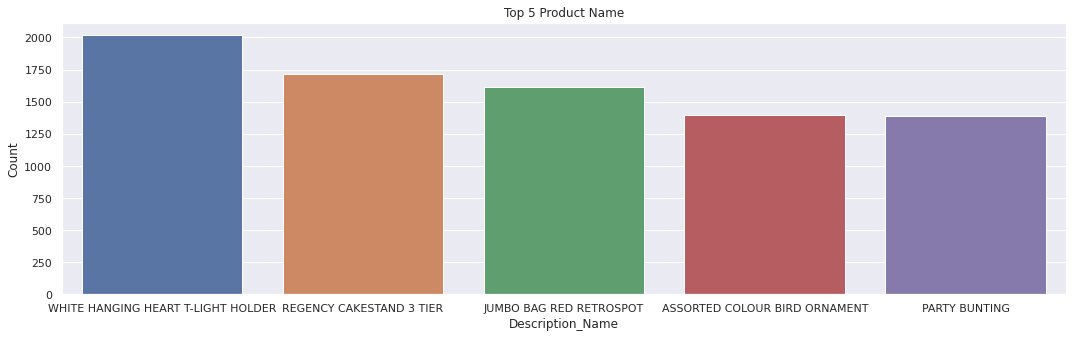

In [ ]:
#visualization of count of description name
plt.figure(figsize=(18,5))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

## Top product based on maximum selling are :

1.WHITE HANGING HEART T-LIGHT HOLDER,

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

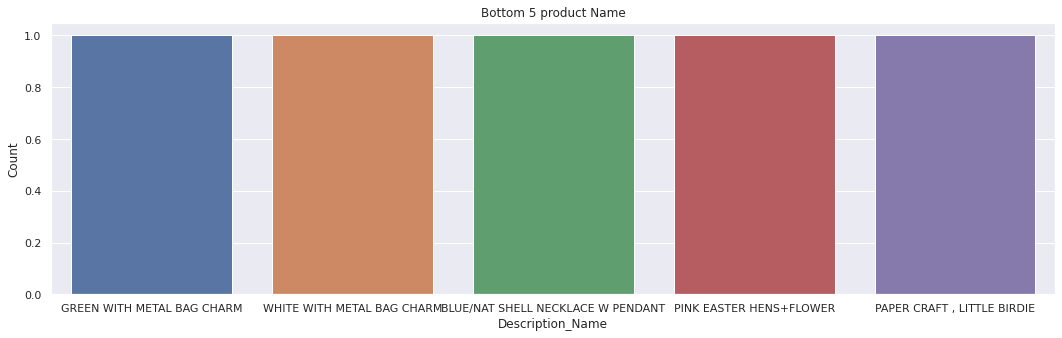

In [ ]:
#visualization of tail of description name
plt.figure(figsize=(18,5))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

## Bottom 5 Product based on the selling are:

1.LIGHT DECORATION BATTERY OPERATED    

2.Water damaged    

3.throw away    

4.re dotcom quick fix.  
  
5.BIRTHDAY BANNER TAPE

In [ ]:
#count of stockcode_name as higher count comes first
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


In [ ]:
#count of stockcode from last
StockCode_df.tail()

,StockCode_Name,Count
3660,20678,1
3661,90059D,1
3662,90168,1
3663,90169,1
3664,23843,1


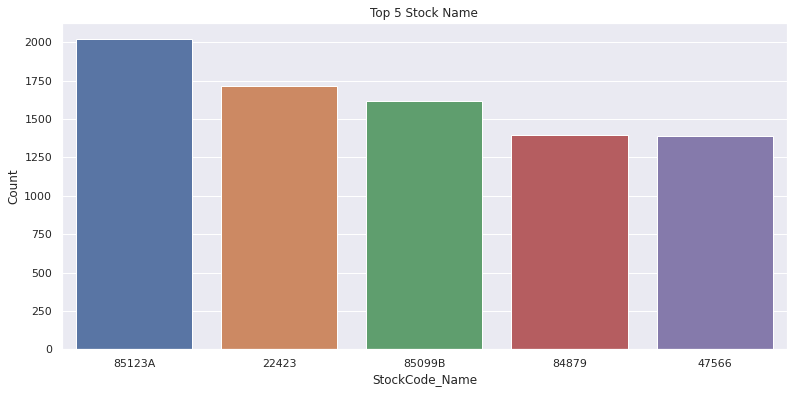

In [ ]:
#visualization of count of stock name
plt.figure(figsize=(13,6))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

## Top 5 Stock name based on selling are :

1.85123A

2.22423

3.85099B   

4.47566

5.20725

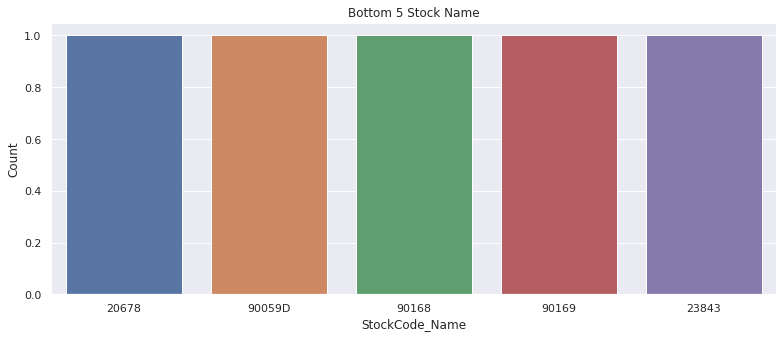

In [ ]:
#visualization
plt.figure(figsize=(13,5))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

In [ ]:
# Counting unique value of country_name as higher count comes first
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


In [ ]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


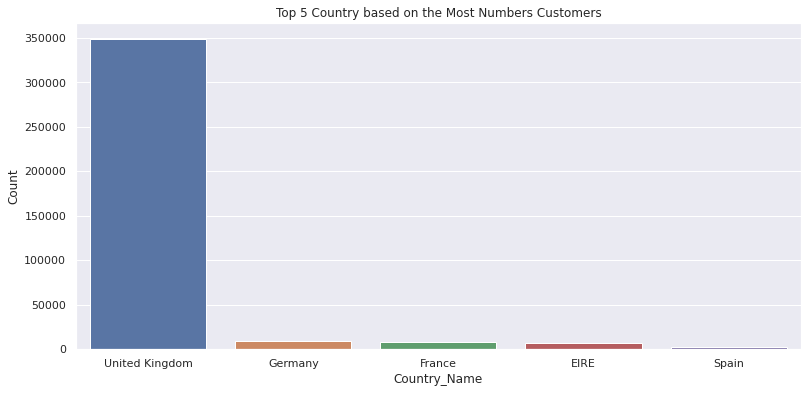

In [ ]:
#visualization of 'Top 5 Country based Most Numbers of  Customers'
plt.figure(figsize=(13,6))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

### From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain

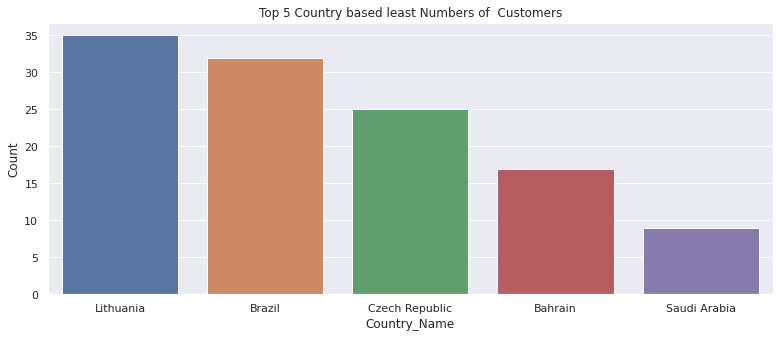

In [ ]:
#visualization of 'Top 5 Country based least Numbers of  Customers'
plt.figure(figsize=(13,5))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

### From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia

In [ ]:
#exploring 'Saudi Arabia'
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia


1. Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode

2. Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode

3. For symmetric graph mean=median=mode

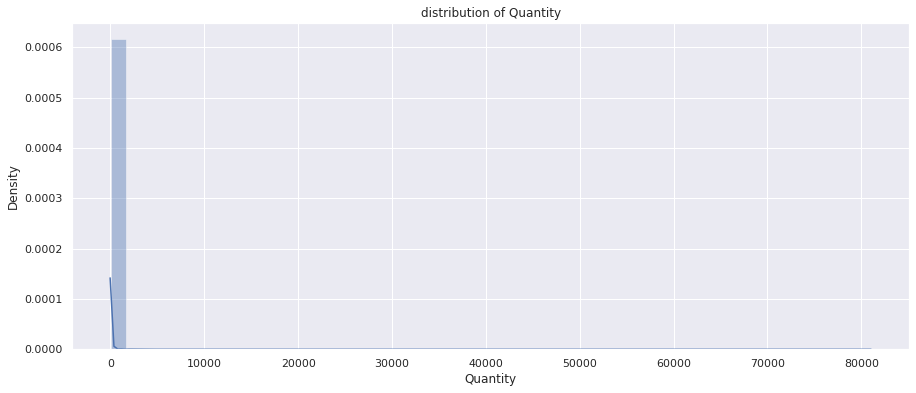

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,6))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

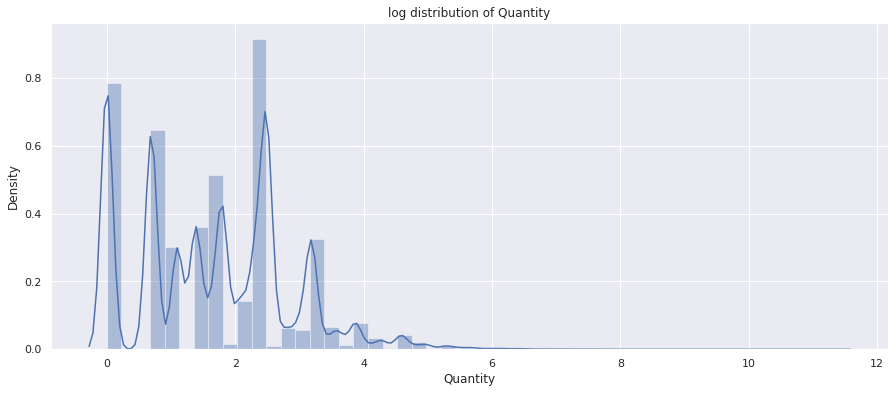

In [ ]:
#applying log distribution on quantity
plt.figure(figsize=(15,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [ ]:
#unique values of Quantity
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [ ]:
#Checking Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


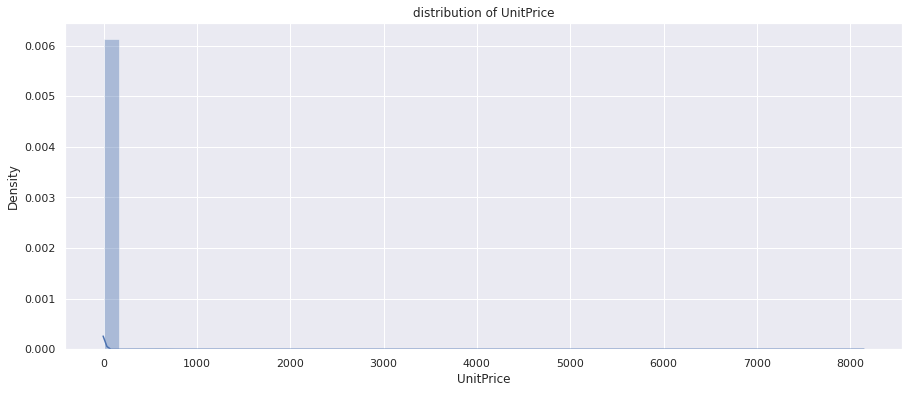

In [ ]:
#visualizing distribution of unit price
plt.figure(figsize=(15,6))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [ ]:
#checking records where unit price is less than 0
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#keeping only records having unit price more than 0
df=df[df['UnitPrice']>0]

In [ ]:
#checking dataset
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


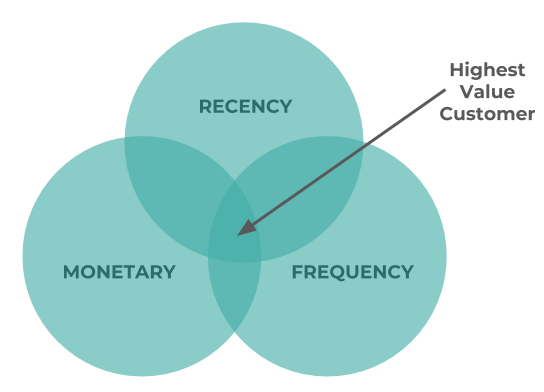

# Feature engineering

In [ ]:
#extracting Invoice Date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

### Convert InvoiceDate columns into date time formate

In [ ]:
#getting Day as feature
df['Day']=df['InvoiceDate'].dt.day_name()

### Create a new features Day from Invoicedate

In [ ]:
# Create some new features from Invoicedate like hours,year,month_num,day_num
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26


### Create some new features from Invoicedate like hours, year, month_num, day_num

In [ ]:
#creating new feature (TotalAmount)
df['TotalAmount']=df['Quantity']*df['UnitPrice']

### Create a new features TotalAmount from product of Quantity and Unitprice

In [ ]:
# adding month name feature from Invoice Date feature
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
#checking changes
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,TotalAmount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December


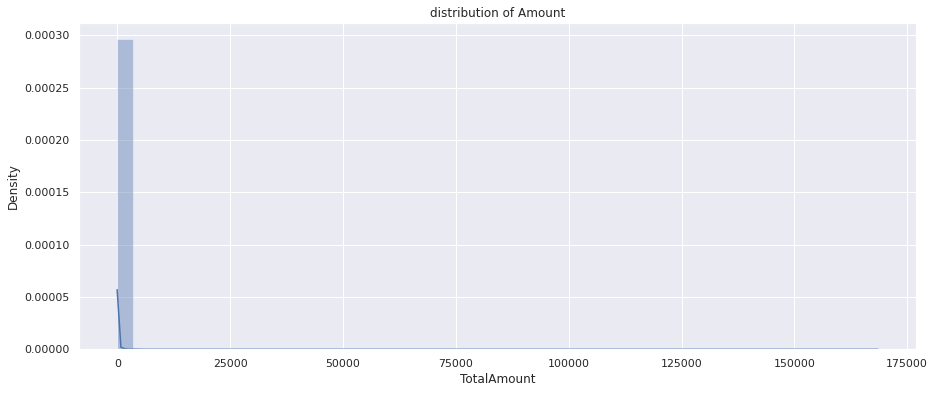

In [ ]:
#checking distribution of Total amount
plt.figure(figsize=(15,6))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="B")

In [ ]:
#get more clear view of Total Amount
df['TotalAmount'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

It seems there can be outliers in Total Amount

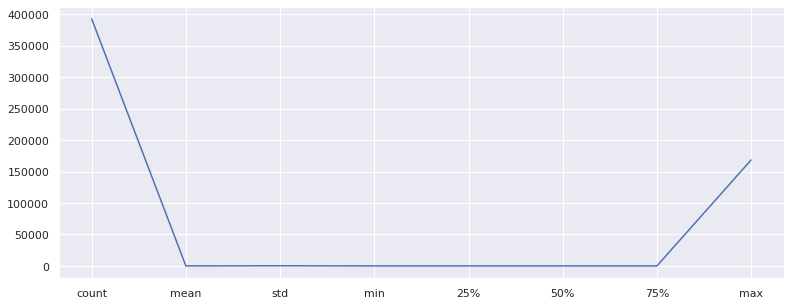

In [ ]:
#visualizing Total amount
plt.figure(figsize=(13,5))
df['TotalAmount'].describe().plot()

In [ ]:
#counting which day has highest count
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


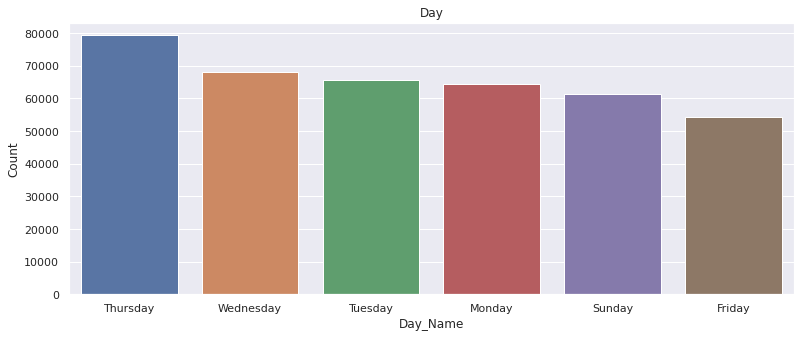

In [ ]:
# visualization of counting of 'which day has highest count'
plt.figure(figsize=(13,5))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

### Most of the customers have purchesed the items in Thursday, Wednesday and Tuesday

In [ ]:
#counting which month has highest count
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


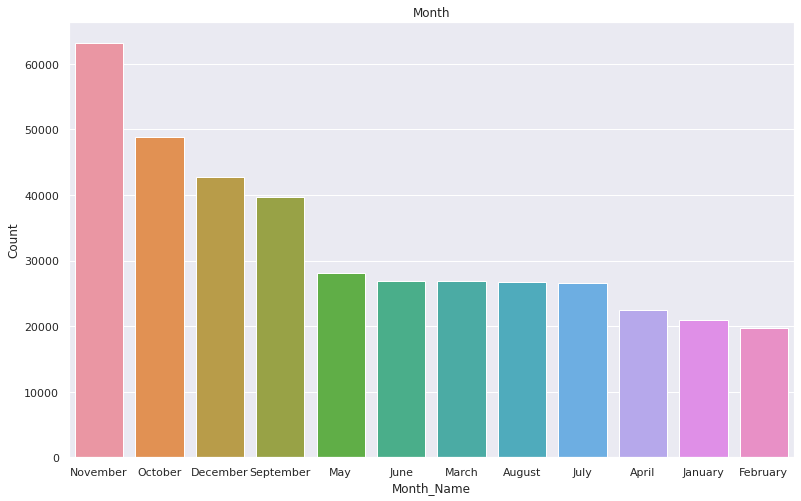

In [ ]:
# visualization on the basis of months
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

### most numbers of customers have purchesed the gifts in the month of November, October, December and September. Less numbers of customers have purchesed the gifts in the month of April, January and February

In [ ]:
# Counting which hour is the most productive for us
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


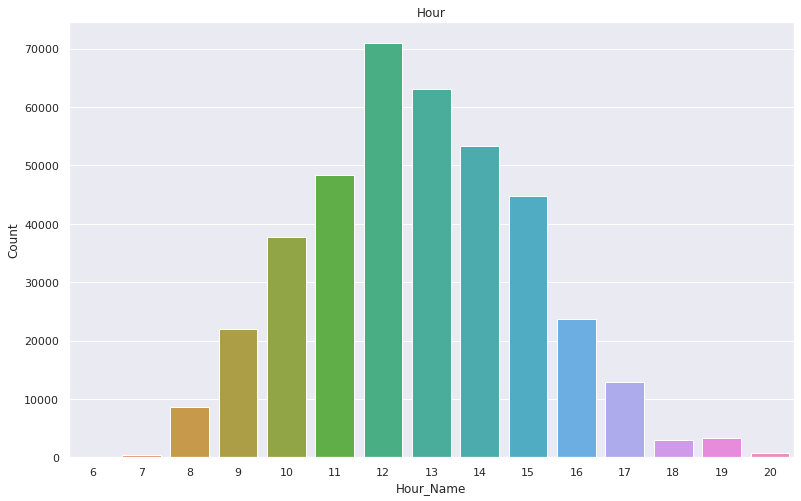

In [ ]:
# visualization of hours
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)


### From this graph we can see that in AfterNoon Time most of the customers have purchased items. 12th hour is the time where we can see most purchases.

In [ ]:
# clustering timings into a specific category
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
#processing time type
df['Time_type']=df['hour'].apply(time_type)

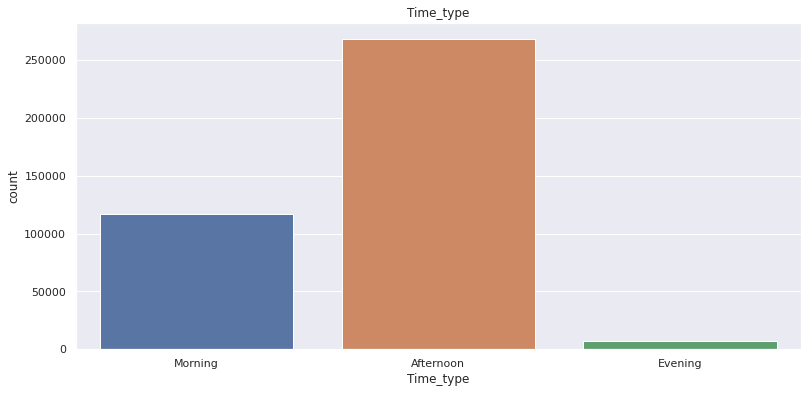

In [ ]:
#visualization of purchases on the basis of time type
plt.figure(figsize=(13,6))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)


### Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening

In [ ]:
#taking look
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,TotalAmount,Month,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December,Morning


# Create the RFM model (Recency, Frequency, Monetary value)

### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

###Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.


### Calculating RFM scores
The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

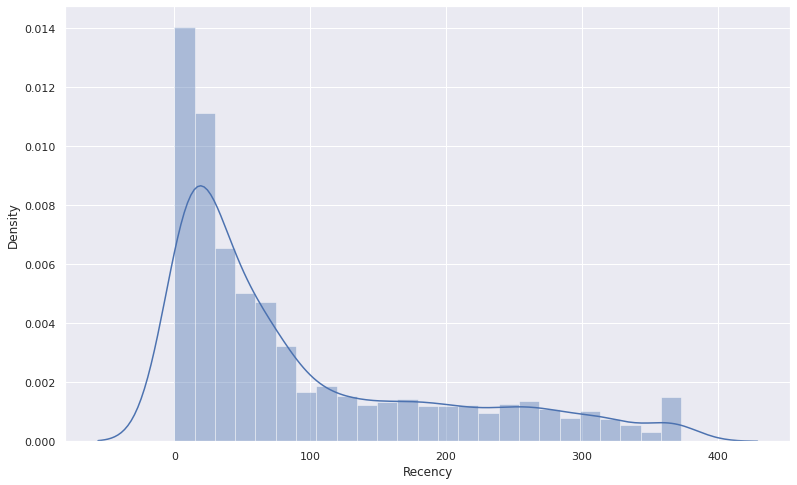

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

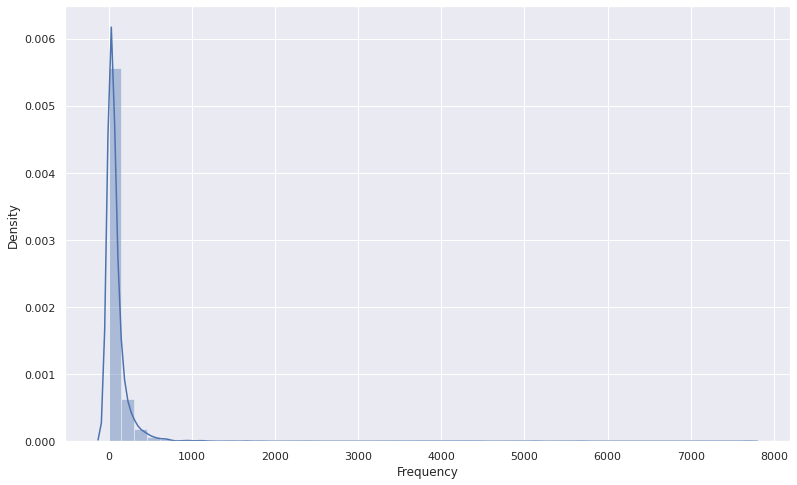

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

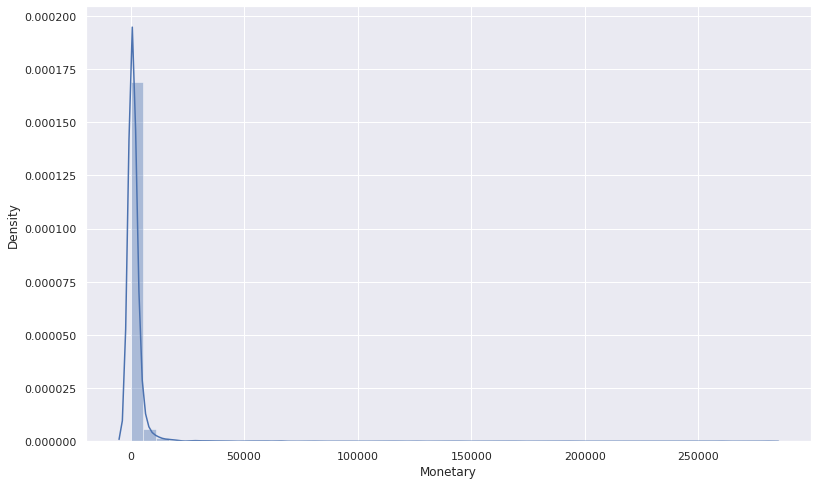

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

## Split into four segments using quantiles

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing df to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

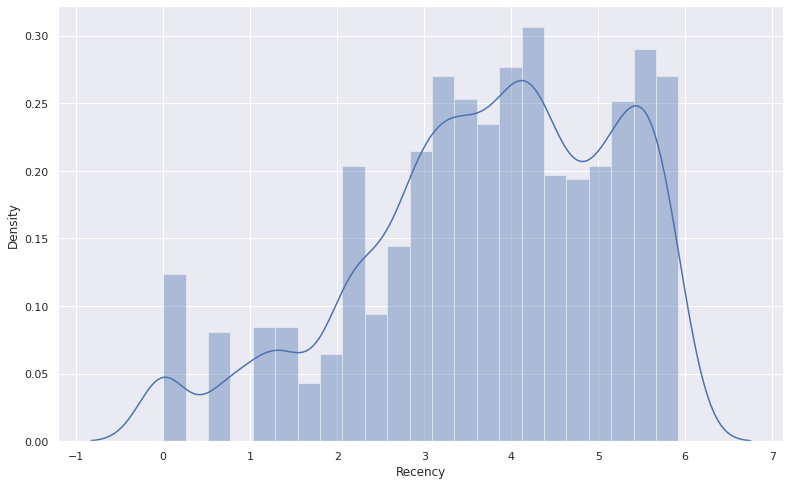

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

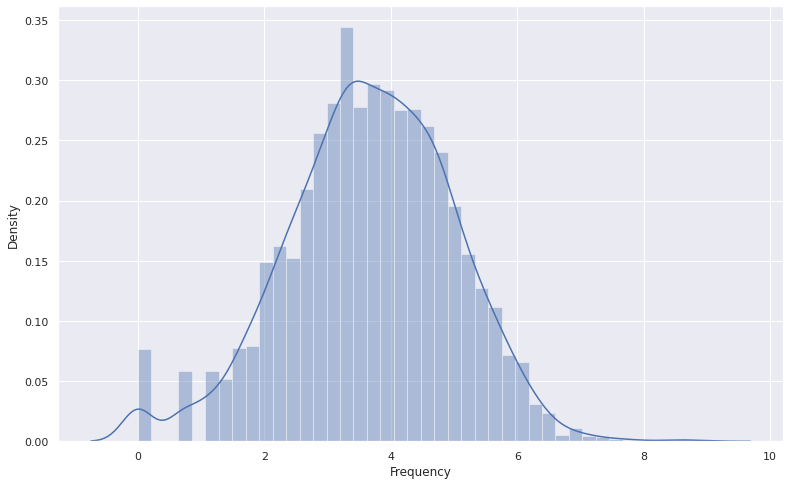

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

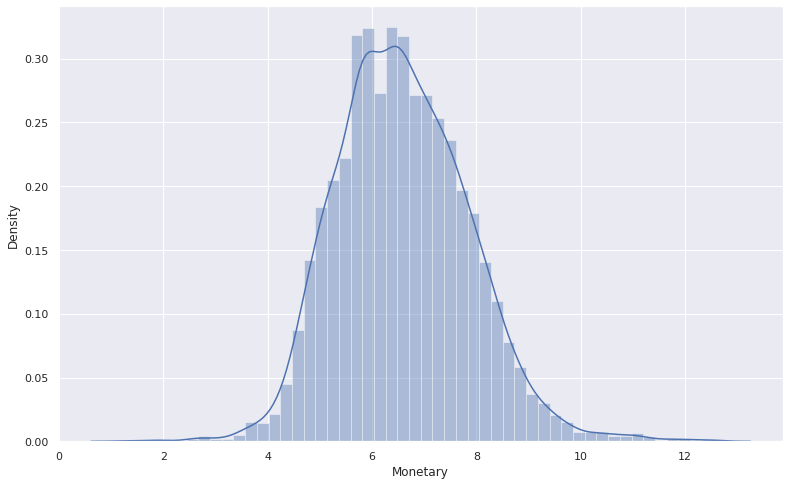

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# K-Means Clustering

### Applying Silhouette Score Method on Recency and Monetary

In [ ]:
# Silhouette score method
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4207311225472853
For n_clusters = 3, silhouette score is 0.3437518298668814
For n_clusters = 4, silhouette score is 0.36507754201396675
For n_clusters = 5, silhouette score is 0.33775253366923635
For n_clusters = 6, silhouette score is 0.34464919940423705
For n_clusters = 7, silhouette score is 0.3477685697514055
For n_clusters = 8, silhouette score is 0.33762519037964034
For n_clusters = 9, silhouette score is 0.34578725758806916
For n_clusters = 10, silhouette score is 0.34682527517254325
For n_clusters = 11, silhouette score is 0.33896718517553986
For n_clusters = 12, silhouette score is 0.3368185260109514
For n_clusters = 13, silhouette score is 0.33704898369413305
For n_clusters = 14, silhouette score is 0.34554200036790594
For n_clusters = 15, silhouette score is 0.338867374058802


# Calculation of Silhouette score

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.

Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is  S=(b−a)max(a,b) .

# Applying Elbow Method on Recency and Monetary

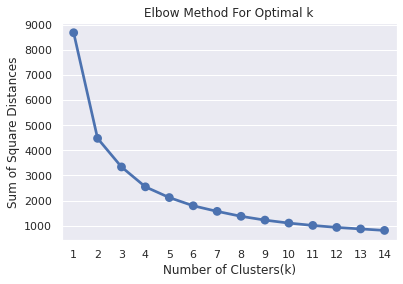

In [ ]:
# Elbow Method on Recency and Monetary
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

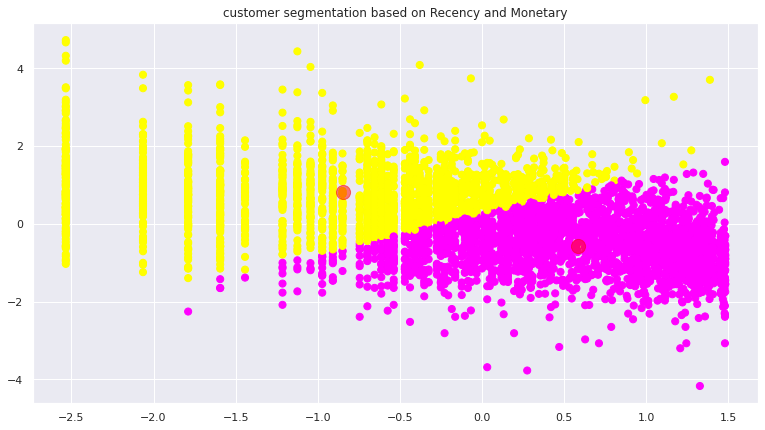

In [ ]:
plt.figure(figsize=(13,7))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)


### We can observe that ,Customers are well separated when we cluster them by Recency and Monetary

# Applying DBSCAN on Recency and Monetary

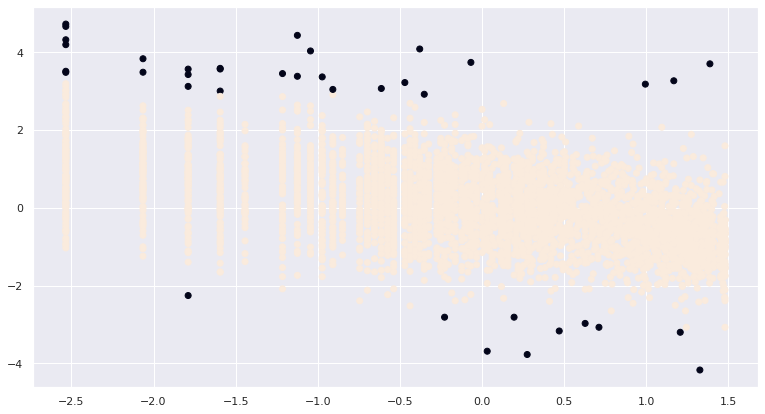

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,7))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### From above plot, we can observe that Customers are well separated when we cluster them by Recency and Monetary

# Applying silhouette Score Method on Frquency and Monetary

In [ ]:
# silhouette Score Method on Frquency and Monetary
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4789405805073289
For n_clusters = 3, silhouette score is 0.40758775321683105
For n_clusters = 4, silhouette score is 0.37267688459411397
For n_clusters = 5, silhouette score is 0.3467394021038058
For n_clusters = 6, silhouette score is 0.363315394511707
For n_clusters = 7, silhouette score is 0.3385574739152404
For n_clusters = 8, silhouette score is 0.35280156040116306
For n_clusters = 9, silhouette score is 0.3444912405083066
For n_clusters = 10, silhouette score is 0.3583038386581434
For n_clusters = 11, silhouette score is 0.3436302427788606
For n_clusters = 12, silhouette score is 0.354924551152287
For n_clusters = 13, silhouette score is 0.3631641631576529
For n_clusters = 14, silhouette score is 0.35667787335527085
For n_clusters = 15, silhouette score is 0.36350641645447407


# Applying Elbow Method on Frequency and Monetary

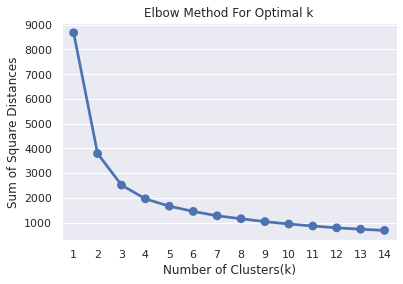

In [ ]:
# Elbow Method on Frequency and Monetary
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#fitting Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

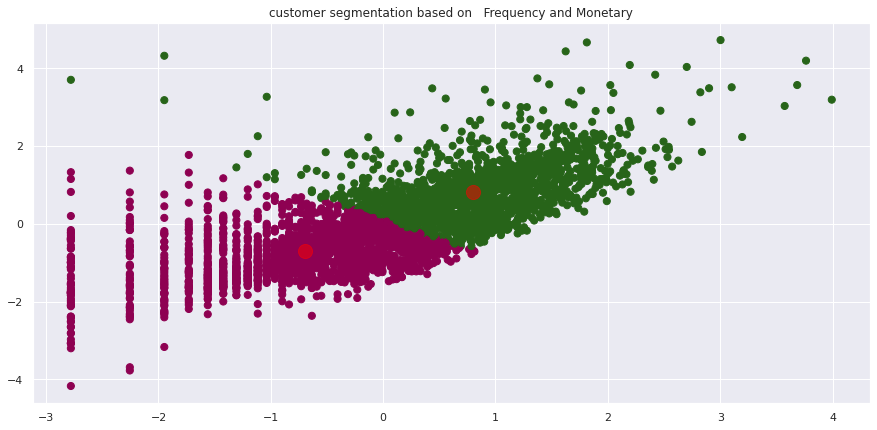

In [ ]:
#visualization of customer segmentation based on   Frequency and Monetary
plt.figure(figsize=(15,7))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### From above plot we can say that Customers are well separated when we cluster them by Frequency and Monetary

# Applying DBSCAN to Method on Frequency and Monetary

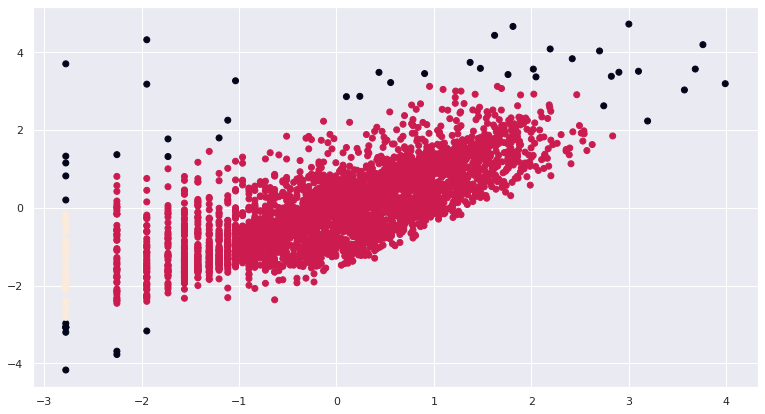

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,7))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### So, Customers are well separated when we cluster them by Frequency and Monetary

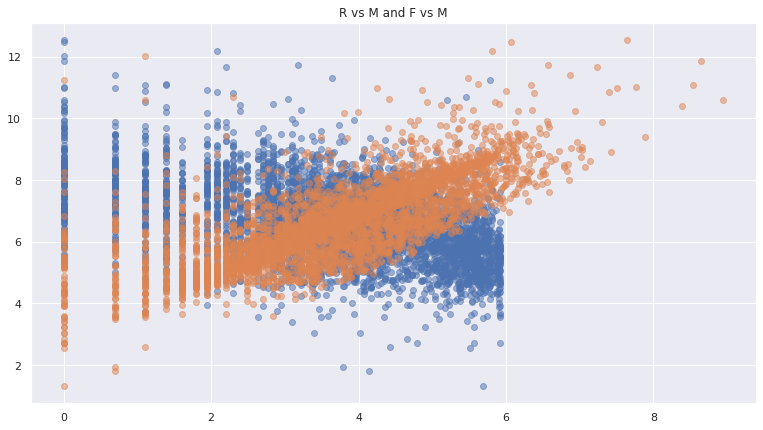

In [ ]:
#plot (R vs M and F vs M)
plt.figure(figsize=(13,7))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

### We got no major insight by plotting this graph. So, let's plot 3D visualization and observe insights.

# 3D visualization of Recency ,Frequency and Monetary

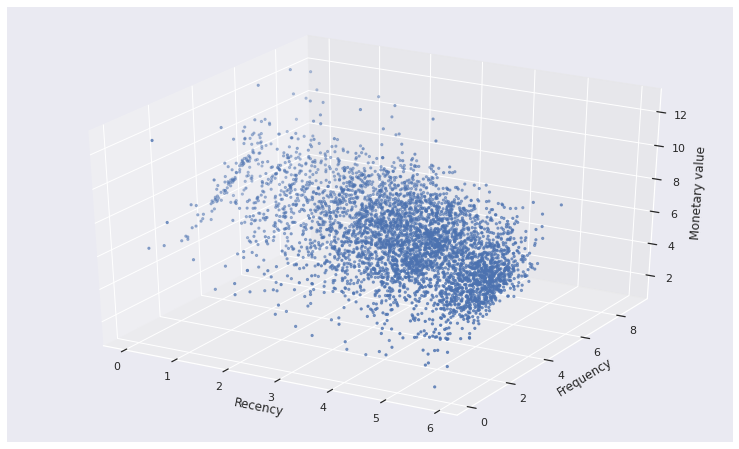

In [ ]:
# 3D visualization 
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(13,8))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()


Here we tried to find relation between Recency ,Frequency and Monetary by 3D visualization.

# Applying Silhouette Method on Recency ,Frequency and Monetary

In [ ]:
# Recency ,Frequency and Monetary
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:
# Applying Silhouette Method
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# fitting kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

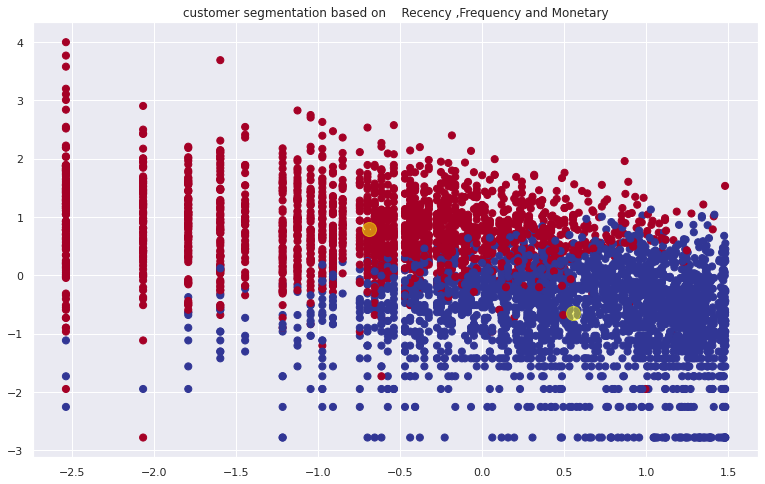

In [ ]:
#visualization
plt.figure(figsize=(13,8))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)


### we can see that, Customers are well separated when we cluster them by Recency ,Frequency and Monetary

# Applying Elbow Method on Recency ,Frequency and Monetary

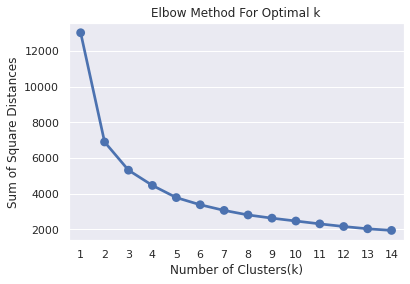

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the df
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942,0
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676,1
12350.0,310,17,334.40,4,4,3,443,11,5.736572,2.833213,5.812338,0
12352.0,36,85,2506.04,2,2,1,221,5,3.583519,4.442651,7.826459,1
12353.0,204,4,89.00,4,4,4,444,12,5.318120,1.386294,4.488636,0
12354.0,232,58,1079.40,4,2,2,422,8,5.446737,4.060443,6.984161,0
12355.0,214,13,459.40,4,4,3,443,11,5.365976,2.564949,6.129921,0


# Dendogram to find the optimal number of clusters

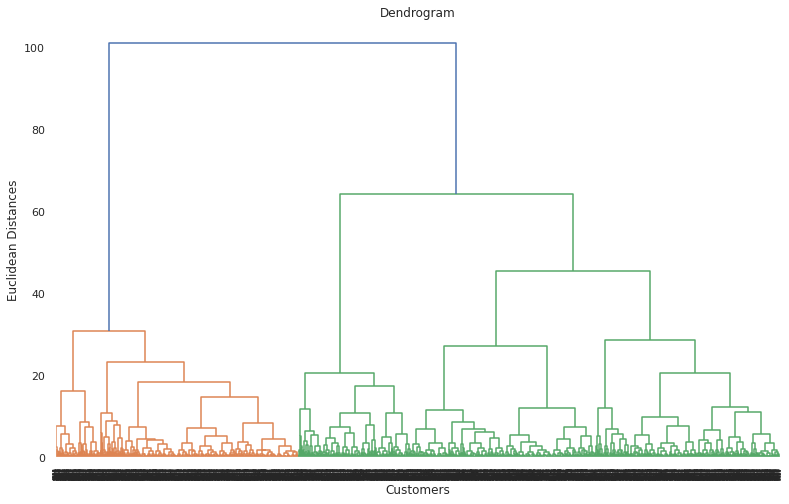

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

## The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90

## No. of Cluster = 2

In [ ]:
# Fitting hierarchical clustering to the mall df
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# By applying different clustering algorithem to our dataset. We got the optimal number of cluster is equal to 2

# Applying DBSCAN to Recency, Frequency and Monetary

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3

# Summary

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow method  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow method  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow method  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

# Conclusion:
We investigated the dataset, checked null values, duplicate values. Then getting Dataset ready for exploratory data analysis. Then we did some feature engineering, we extracted the DateTime column for getting some more useful columns. We also created the Total amount as a new variable. Thus we prepared our data for models. After that, we created an RFM model (Recency, Frequency, Monetary value). We did a log transformation of R, F, M for better results. Now comes the model-building part, we used the K-Means clustering algorithm to find the optimal number of clusters that can separate customers based on their purchasing behavior. We then applied the K-Means algorithm with the Silhouette Score Method on RM, FM, RFM simultaneously. Where we got the optimal number of clusters = 2. We then visualized our results with scatterplots. Then moving forward we applied K-Means with Elbow Method on RM, FM, RFM simultaneously. Next, we applied DBSCAN on RM, FM, and RFM where we got the optimal number of clusters as 2, 2, 3 simultaneously. After that, we applied Dendrogram to find the optimal number of clusters..

###So, by applying various algorithms, optimal number of cluster is equal to 2.